In [112]:
# *** IMPORT LIBRARIES ***

# Importing Pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import ttest_1samp


In [113]:
# Reading and previewing the dataset
#
df = pd.read_csv('train.csv')

# previedthe first five rows od the dataset
df.head(5)


,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0


In [114]:
# previedthe last five rows od the dataset
df.tail(5)


,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1
23523,23523,0,0,1,10,20,1,2018,1,0,...,0,0,1,0,0,0,0,0,0,1


Checking the size

In [115]:
# Checking the dataset size, shape and info
def size_shape(data):
    return data.info(), data.shape, data.size


size_shape(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 39 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Unnamed: 0                                       23524 non-null  int64
 1   bank_account                                     23524 non-null  int64
 2   location_type                                    23524 non-null  int64
 3   cellphone_access                                 23524 non-null  int64
 4   household_size                                   23524 non-null  int64
 5   age_of_respondent                                23524 non-null  int64
 6   gender_of_respondent                             23524 non-null  int64
 7   year_                                            23524 non-null  int64
 8   relationship_with_head_Child                     23524 non-null  int64
 9   relationship_with_head_Head of Household         2

(None, (23524, 39), 917436)

In [116]:
# drop irrelevant fields
df.drop(['year_', 'marital_status_Divorced/Seperated', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed' ], axis=1, inplace=True)
df

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [151]:
# Frequency table for people with bank accounts
#
frequency_df = pd.DataFrame(df, columns=['bank_account', 'location_type', 'cellphone_access', 'age_of_respondent', 'gender_of_respondent', 'education_level_No formal education', 'education_level_Other/Dont know/RTA','education_level_Primary education', 'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training', 'education_level_Tertiary education', 'job_type_Formally employed Government', 'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Government Dependent', 'job_type_Informally employed', 'job_type_No Income', 'job_type_Other Income', 'job_type_Remittance Dependent', 'job_type_Self employed'])
frequency_df.bank_account.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [118]:
# Frequency table for people with cellpones
#
frequency_df.cellphone_access.value_counts()


1    17454
0     6070
Name: cellphone_access, dtype: int64

In [119]:
# Frequency table for gender of respondents
#
frequency_df.gender_of_respondent.value_counts()


0    13877
1     9647
Name: gender_of_respondent, dtype: int64

In [120]:
# Frequency table for age of respondents
#
frequency_df.age_of_respondent.value_counts().head(10)

30    1056
35     836
25     792
28     748
32     715
40     685
20     626
26     615
23     588
18     585
Name: age_of_respondent, dtype: int64

## KENYA

In [121]:
# Split data frame countrywise
df_country__Kenya=df[:6068]
df_country__Kenya.head(5)


,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [122]:
# Frequency table for countries
#
df["country__Kenya"].value_counts()

0    17456
1     6068
Name: country__Kenya, dtype: int64

### People with & without a bank account per education level in KENYA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

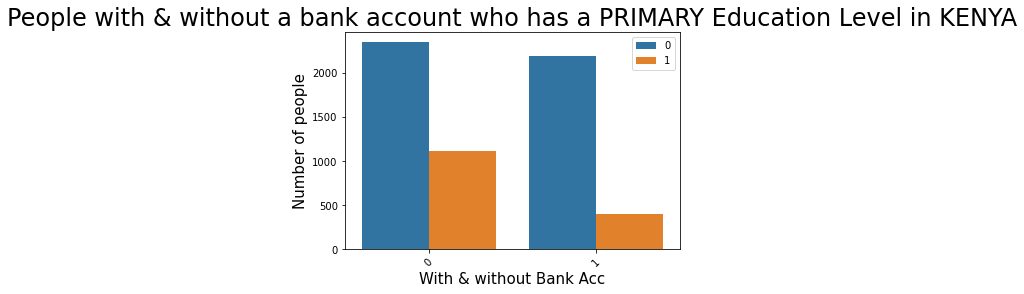

In [123]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Primary education"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

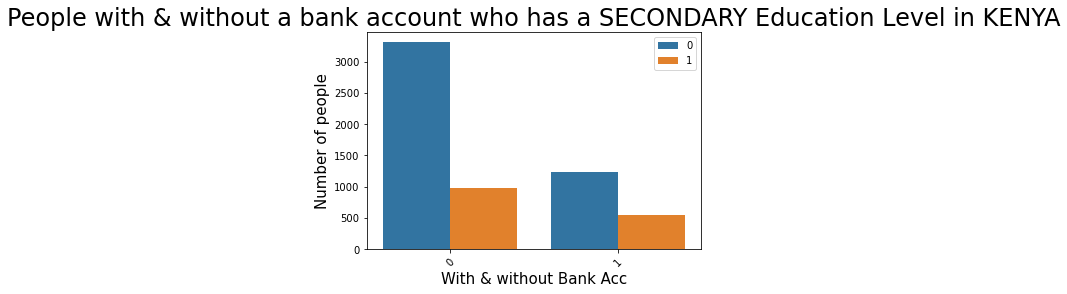

In [124]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Secondary education"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

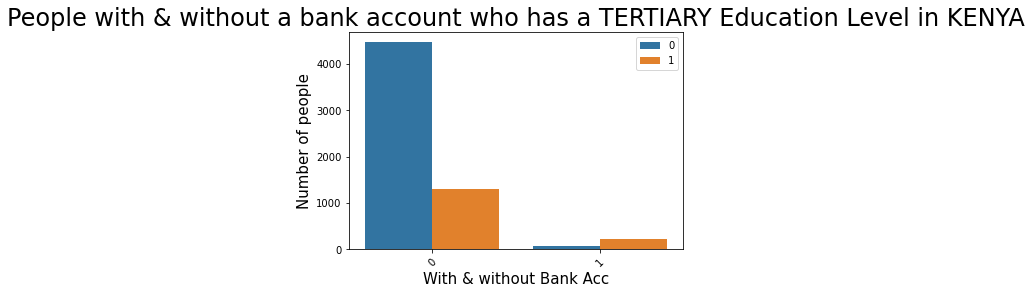

In [125]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Tertiary education"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

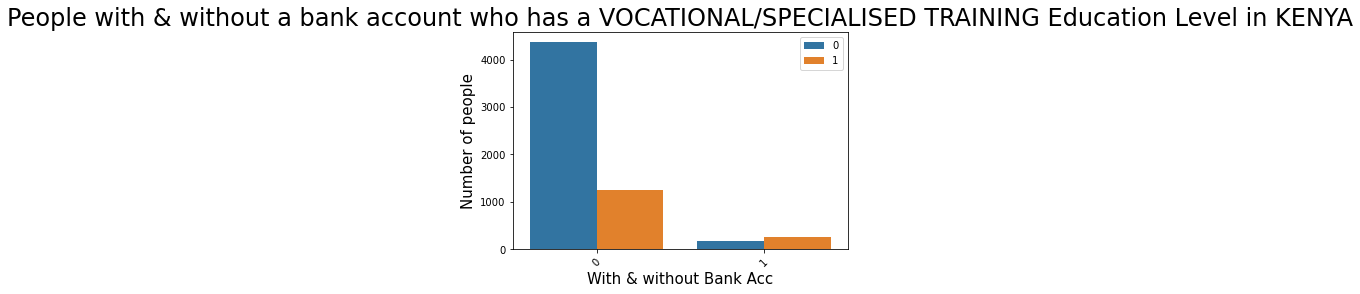

In [138]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Vocational/Specialised training"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

## TANZANIA

In [133]:
# Split data frame countrywise
df_country__Tanazania=df[14803:21422]
df_country__Tanazania.head(5)

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
14803,14803,0,0,1,6,22,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
14804,14804,0,1,0,2,100,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14805,14805,0,1,1,3,19,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
14806,14806,0,1,0,4,21,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14807,14807,1,1,1,5,24,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [134]:
# Frequency table for countries
#
df["country__Tanzania"].value_counts()

0    16904
1     6620
Name: country__Tanzania, dtype: int64

### People with & without a bank account per education level in TANZANIA

NameError: name 'country__Tanzania' is not defined

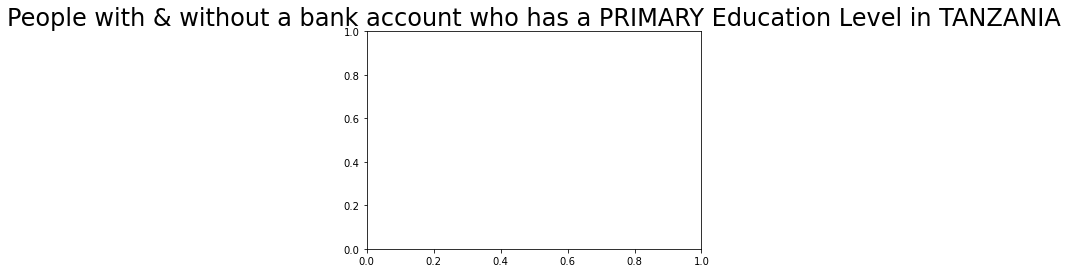

In [137]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in TANZANIA', fontsize=24)
sns.countplot(df_country__Tanzania["education_level_Primary education"], hue=df_country__Tanzania["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

NameError: name 'df_country__Tanzania' is not defined

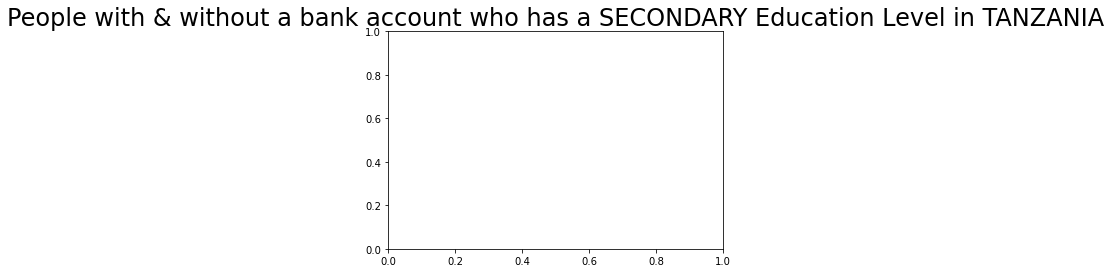

In [139]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in TANZANIA', fontsize=24)
sns.countplot(df_country__Tanzania["education_level_Secondary education"], hue=df_country__Tanzania["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

NameError: name 'df_country__Tanzania' is not defined

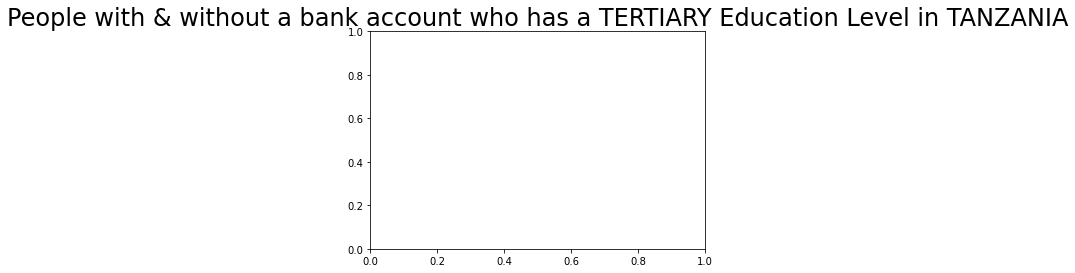

In [140]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in TANZANIA', fontsize=24)
sns.countplot(df_country__Tanzania["education_level_Tertiary education"], hue=df_country__Tanzania["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

NameError: name 'df_country__Tanzania' is not defined

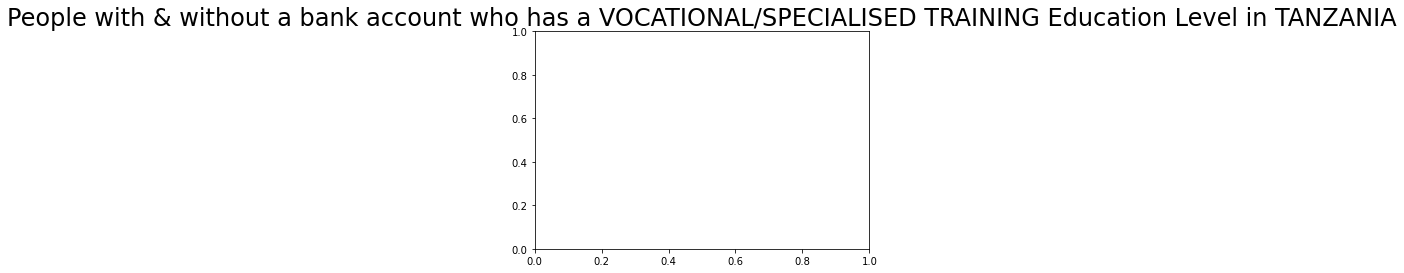

In [141]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in TANZANIA', fontsize=24)
sns.countplot(df_country__Tanzania["education_level_Vocational/Specialised training"], hue=df_country__Tanzania["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

# RWANDA

In [142]:
# Split data frame countrywise
df_country__Rwanda=df[6068:14803]
df_country__Rwanda.head(5)

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
6068,6068,0,1,1,7,18,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6069,6069,1,1,1,4,26,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6070,6070,0,0,0,6,42,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6071,6071,1,1,1,1,41,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6072,6072,0,0,0,4,17,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [143]:
# Frequency table for countries
#
df["country__Rwanda"].value_counts()

0    14789
1     8735
Name: country__Rwanda, dtype: int64

### People with & without a bank account per education level in RWANDA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

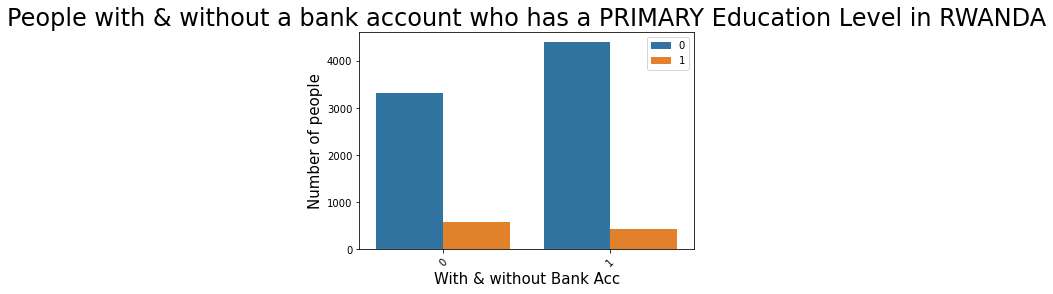

In [144]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Primary education"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

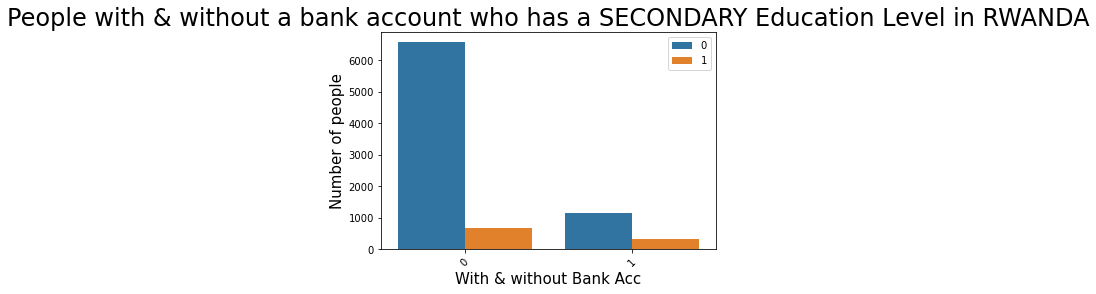

In [145]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Secondary education"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

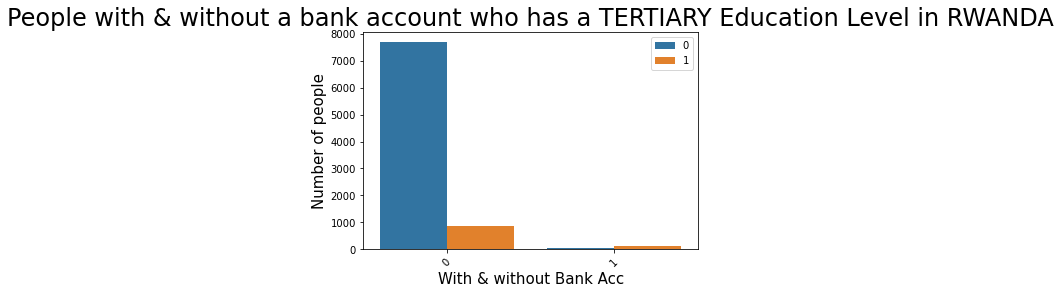

In [146]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Tertiary education"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

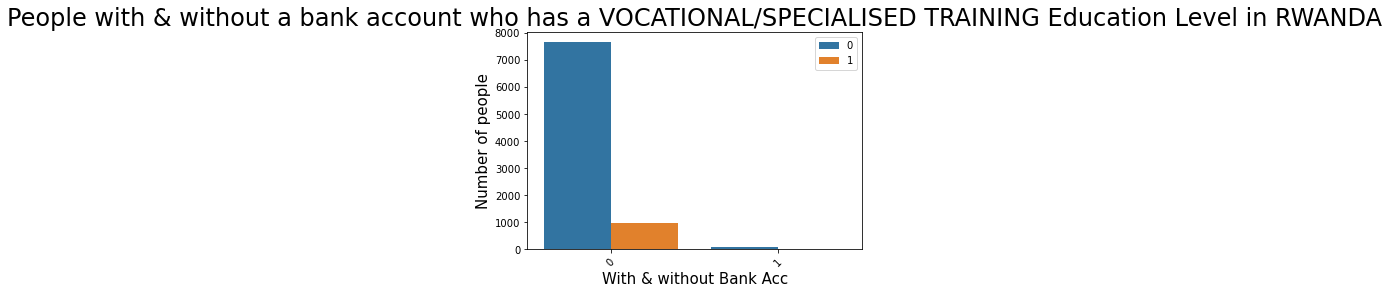

In [147]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Vocational/Specialised training"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

# **UGANDA**

### People with & without a bank account per education level in UGANDA

NameError: name 'df_country__Uganda' is not defined

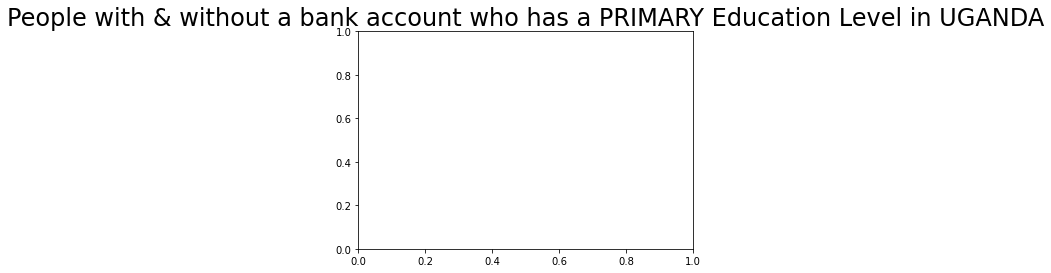

In [148]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Primary education"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

NameError: name 'df_country__Uganda' is not defined

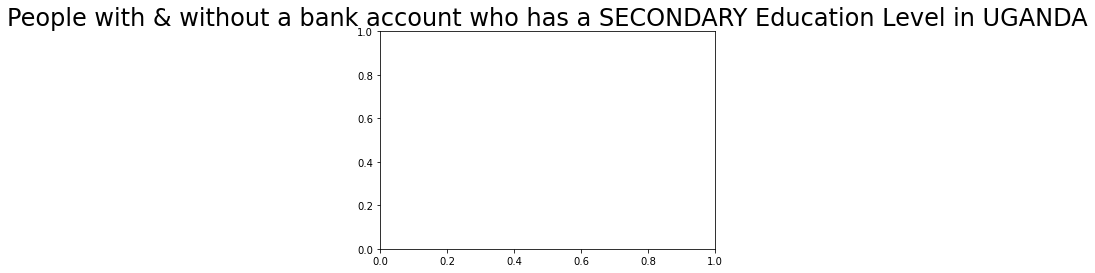

In [149]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Secondary education"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

In [ ]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Tertiary education"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

In [ ]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Vocational/Specialised training"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)